In [421]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob
import random
import os
import torchvision.transforms

In [422]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

In [423]:
transform_pipe = torchvision.transforms.Compose([
    torchvision.transforms.ToPILImage(), # Convert np array to PILImage
    
    torchvision.transforms.RandomCrop(size=(500, 500)),
    
    torchvision.transforms.RandomHorizontalFlip(0.5),
    
    torchvision.transforms.RandomVerticalFlip(0.5),
    
    torchvision.transforms.ToTensor()
])

In [424]:
data_norm = torchvision.transforms.Normalize(mean=[0.78092086, 0.5018261, 0.7803567],
                                 std=[0.16727196, 0.24176046, 0.13103652])
anno_norm =  torchvision.transforms.Normalize(mean=[0.00202586], std=[0.00176733])

In [425]:
class CustomDataset(Dataset):
    
    def __init__(self, img_list, anno_list, num_of_classes=2, transform=None):
        
        self.img_list = img_list
        self.anno_list = anno_list
        self.num_of_classes = num_of_classes
        self.transform = transform
        
    def __getitem__(self, img_id):
        
        image = Image.open(img_list[img_id])
        img = np.array(image)
        anno = np.array(Image.open(self.anno_list[img_id]).convert("L"))
        seed = np.random.randint(2147483647)
        random.seed(seed)
        if self.transform:
            img = self.transform(img)
            img = data_norm(img)
            random.seed(seed)
            anno = self.transform(anno)
#             anno = anno_norm(anno)
        
#         anno[anno > 0] = 1
        sample = {"image": img, "annotation": anno}
        return sample
    
    
    def __len__(self):
        return len(self.img_list)

In [426]:
path_to_images = 'train/raw_images'
path_to_annotations = 'train/annotations_white'
# test if sample and label are manage in a same way
# path_to_images = 't1/sample'
# path_to_annotations = 't1/label'

In [427]:
img_list = glob.glob(path_to_images + os.sep + "*.bmp")
img_list = sorted(img_list)
anno_list = glob.glob(path_to_annotations + os.sep + "*.bmp")
anno_list = sorted(anno_list)
dataset_train = CustomDataset(img_list, anno_list, 2, transform=transform_pipe)

In [428]:
dataloader_train = torch.utils.data.DataLoader(
    dataset_train,
    batch_size = 1,
)

In [429]:
# data_mean = []
# data_std = []
# anno_mean = []
# anno_std = []

# for _, batch_data in enumerate(dataloader_train):
#     numpy_image = batch_data['image'].numpy()
#     numpy_anno = batch_data['annotation'].numpy()
#     data_mean.append(np.mean(numpy_image, axis=(0,2,3)))
#     data_std.append(np.std(numpy_image, axis=(0,2,3)))
#     anno_mean.append(np.mean(numpy_anno, axis=(0,2,3)))
#     anno_std.append(np.std(numpy_anno, axis=(0,2,3)))

# data_mean = np.array(data_mean).mean(axis=0)
# data_std = np.array(data_std).mean(axis=0)
# anno_mean = np.array(anno_mean).mean(axis=0)
# anno_std = np.array(anno_std).mean(axis=0)

# print("mean: " + str(data_mean))
# print("std: " + str(data_std))
# print("mean: " + str(anno_mean))
# print("std: " + str(anno_std))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 3, 500, 500)


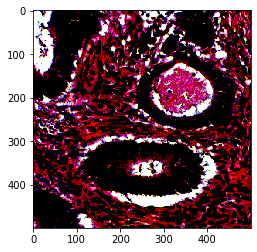

torch.Size([1, 1, 500, 500])
tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0078, 0.0078, 0.0078,  ..., 0.0000, 0.0000, 0.0000],
          [0.0078, 0.0078, 0.0078,  ..., 0.0000, 0.0000, 0.0000],
          [0.0078, 0.0078, 0.0078,  ..., 0.0000, 0.0000, 0.0000]]]])



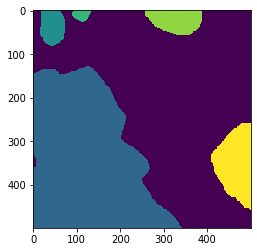

In [430]:
for batch_num, batch_data in enumerate(dataloader_train):
    fig_img = plt.figure()
    print(batch_data['image'].numpy().shape)
    plt.imshow(batch_data['image'][0].permute(1, 2, 0).numpy())
    plt.show()
    print(batch_data['annotation'].shape)
    print(batch_data['annotation'])
    plt.imshow(batch_data['annotation'][0][0])
    fig_img.suptitle('image')
    print()
    plt.show()
    break